# What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

![Conv Gif](./conv.gif)

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./conv_detailed.gif)

### Question 1

In [45]:
# Write a function which does the convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors
# assume valid padding and depth=1


In [78]:
def conv2D(stride,kernel_row,kernel_col,kernel_depth,num_kernel,input_image):
    result = np.zeros([input_image.shape[0]-kernel_row+1, input_image.shape[1]-kernel_col+1,num_kernel])
    weights = np.random.randn(num_kernel,kernel_row,kernel_col,kernel_depth)
    for num in range(num_kernel):
        for row in range(0,input_image.shape[0]-kernel_row+1,stride):
            for col in range(0,input_image.shape[1]-kernel_col+1,stride):
                product = weights[num,:,:,:]*input_image[row:(kernel_row+row),col:(kernel_col+col),:]
                sum1=0
                for depth in range(0,kernel_depth):
                    sum1+= product[depth].sum()
                result[row,col,num] = sum1
    return result
conved_img = conv2D(1,3,3,3,3,image)

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Max_pooling.png)

### Question 1

In [79]:
# Write a function which does the max pooling.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors
def max_pool2D(stride,kernel_row,kernel_col,num_kernel,input_image):
    result = np.zeros([ input_image.shape[0]-kernel_row+1, input_image.shape[1]-kernel_col+1,num_kernel])
    weights = np.random.randn(num_kernel,kernel_row,kernel_col)
    for num in range(num_kernel):
        for row in range(0,input_image.shape[0],stride):
            if(row+kernel_row > input_image.shape[0]-1):
                break
            for col in range(0,input_image.shape[1],stride):
                if(col+kernel_col > input_image.shape[1]-1):
                    break
                window = input_image[row:(kernel_row+row),col:(kernel_col+col),:]
                max1 = window.max()
                result[row,col,num] = max1
    return result


### Question 2

In [80]:
# Write a function which does the average convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors
def avg_pool2D(stride,kernel_row,kernel_col,num_kernel,input_image):
    result = np.zeros([ input_image.shape[0]-kernel_row+1, input_image.shape[1]-kernel_col+1,num_kernel])
    print(result.shape)
    weights = np.random.randn(num_kernel,kernel_row,kernel_col)
    for num in range(num_kernel):
        for row in range(0,input_image.shape[0],stride):
            if(row+kernel_row > input_image.shape[0]-1):
                break
            for col in range(0,input_image.shape[1],stride):
                if(col+kernel_col > input_image.shape[1]-1):
                    break
                window = input_image[row:(kernel_row+row),col:(kernel_col+col),:]
                avg1 = window.mean()
                result[row,col,num] = avg1
    return result

# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [81]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

### Display the image

In [82]:
image = cv2.imread('/home/admin-pc/Downloads/beer.png') # Please load different Images to explore 

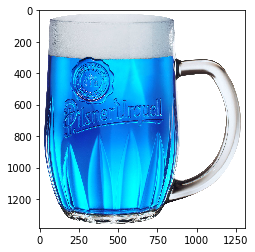

In [83]:
plt.imshow(image)

In [84]:
# what does the image look like?
image.shape

(1384, 1310, 3)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - no of rows,cols and channels(color or grey) in input


## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [85]:
model = Sequential()
model.add(Convolution2D(3,    # number of output kernels___________
                        (3,    # ___row________ dimension of kernel 
                        3),    # ___col________ dimension of kernel
                        input_shape=image.shape))
print (model.output_shape)

(None, 1382, 1308, 3)


In [86]:
image_batch = np.expand_dims(image,axis=0)
image_batch.shape

(1, 1384, 1310, 3)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer - expand to define no of samples

In [87]:
image_batch.shape

(1, 1384, 1310, 3)

In [88]:
conv_image = model.predict(image_batch)
conv_image.shape

(1, 1382, 1308, 3)

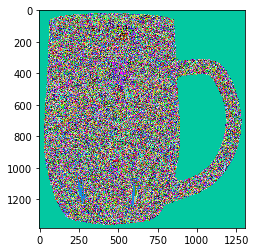

In [89]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [90]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

(1382, 1308, 3)


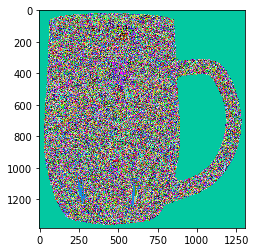

In [91]:
visualize_image(model, image)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

In [92]:
conved_img.shape

(1382, 1308, 3)

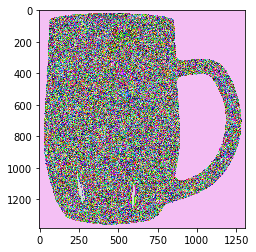

In [93]:
plt.imshow(conved_img)

## 10x10 Kernel Convimage

(1375, 1301, 3)


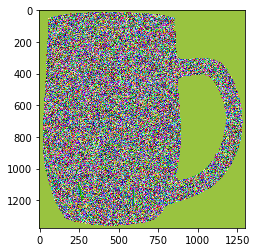

In [98]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)


## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernal size ? 

Answer - 3*3 is more sharp

### Question 2

### What is the reason behing this difference ?

Answer - small size filters help to capture even the minute details

# Play around with code below, to enhance your understading

## Another image Vis 

In [18]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [19]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

(1382, 1308, 1)
(1382, 1308)


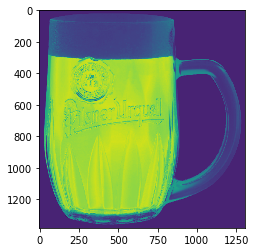

In [20]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer - only one channel in latter one

## Increase the kernal size

(1370, 1296, 1)
(1370, 1296)


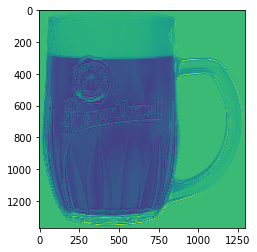

In [21]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [25]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



(1382, 1308, 1)
(1382, 1308)


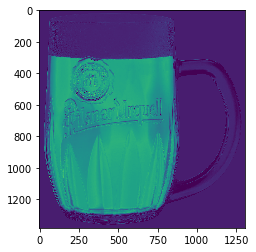

In [26]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

(276, 261, 3)


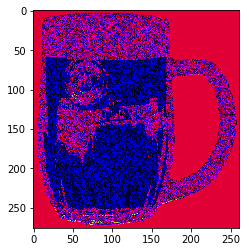

In [24]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)